## Text Analysis

In [ ]:
! pip install matplotlib

In [3]:
import nltk
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import collections
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
 nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Importing data

In [5]:
def getData(files):
    merged_dfs = []    
    for file in files:
        print(file)
        csv_file = pd.read_csv(file)
        merged_dfs.append(csv_file)
    return pd.concat(merged_dfs, ignore_index = True) #resets index in order to avoid multiples of same index

In [6]:
df = getData(['article_scrape1_amend.csv', 'med.csv', 'end_redo.csv'])

article_scrape1_amend.csv
med.csv
end_redo.csv


In [38]:
df.shape

(18945, 10)

### cleaning data 

In [31]:
df.drop(df[df['article'].str.len()==2].index, inplace=True)

In [32]:
len(df[df['article'].str.len()==2])

0

In [35]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1' ], axis=1, inplace=True)

In [39]:
df

,article,date,headline,id,score,snippet,source,type,url,word_count
0,"['A son of Robert L. Vesco, the fugitive Ameri...",1981-01-02,b'Vesco Son Says His Father Will Return Home S...,4fd1167d8eb7c8105d5cd5a7,0.003075,"b""A son of Robert L. Vesco, the fugitive Ameri...",The New York Times,News,https://www.nytimes.com/1981/01/02/us/around-t...,170
1,"[""Japanese investors have now bought almost ev...",1981-01-03,"b""SWELLING JAPANESE INVESTMENT IS PLAYING A KE...",4fd117098eb7c8105d5ce352,0.002930,"b""Japanese investors have now bought almost ev...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/swelling...,887
2,"[""Federal officials said today that the Govern...",1981-01-03,b'U.S. MAY APPEAL RULING FORBIDDING INDEFINITE...,4fd11cb88eb7c8105d5d9d45,0.013576,"b""Federal officials said today that the Govern...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/us-may-a...,718
3,['The General Accounting Office says there app...,1981-01-04,b'BOGUS SOCIAL SECURITY CARDS FOUND INCREASING...,4fd11cba8eb7c8105d5d9ef5,0.003003,b'The General Accounting Office says there app...,The New York Times,News,https://www.nytimes.com/1981/01/04/us/bogus-so...,677
4,"[""Robert L. Vesco, the fugitive American finan...",1981-01-04,"b""VESCO ASSERTS HE ISN'T IN HIDING""",4fd111ab8eb7c8105d5c825f,0.003026,"b""Robert L. Vesco, the fugitive American finan...",The New York Times,News,https://www.nytimes.com/1981/01/04/us/vesco-as...,253
5,['After months of intense lobbying and interna...,1981-01-07,b'IDENTIFICATION CARD IDEA SHELVED BY A U.S. P...,4fd10cdf8eb7c8105d5c0e10,0.012033,b'After months of intense lobbying and interna...,The New York Times,News,https://www.nytimes.com/1981/01/07/us/identifi...,230
6,['Bahamian immigration officials who want to d...,1981-01-08,b'Bahamian Officials Order Vesco To Leave the ...,4fd1162c8eb7c8105d5ccc3f,0.010615,b'Bahamian immigration officials who want to d...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/bahamian...,178
7,['A Federal immigration commission today retra...,1981-01-08,b'Immigration Panel Modifies Opposition to Ide...,4fd10ce08eb7c8105d5c0f26,0.024651,b'A Federal immigration commission today retra...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/around-t...,145
8,"[""Former Representative Richard Kelly steadfas...",1981-01-08,"b'KELLY SAYS HE TOOK $25,000 AS COVER-UP'",4fd116838eb7c8105d5cd8cc,0.003124,"b""Former Representative Richard Kelly steadfas...",The New York Times,News,https://www.nytimes.com/1981/01/08/us/kelly-sa...,504
9,['Scheduled passenger airline service between ...,1981-01-08,b'SCHEDULED AIR SERVICE FROM CHINA TO U.S. RES...,4fd10ddb8eb7c8105d5c2937,0.008202,b'Scheduled passenger airline service between ...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/schedule...,640


In [37]:
df.drop_duplicates(subset=['article'], keep='last', inplace=True)

In [40]:
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18945 entries, 0 to 21507
Data columns (total 10 columns):
article       18945 non-null object
date          18945 non-null datetime64[ns]
headline      18945 non-null object
id            18945 non-null object
score         18945 non-null float64
snippet       18945 non-null object
source        18904 non-null object
type          18944 non-null object
url           18945 non-null object
word_count    18945 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.6+ MB


In [43]:
df.to_csv('ArticleMaster.csv')

#### LDA code to do topic modeling 

In [3]:
df = pd.read_csv('All.csv')

In [4]:
df['article'][0]

'[\'A son of Robert L. Vesco, the fugitive American financier who disappeared from his home in Nassau before Bahamian authorities could serve him with a deportation order, said today that his father would return Sunday.\', "\'\'He\'s not here right now and he won\'t be back until Sunday,\'\' Anthony Vesco, 23 years old, said in a telephone conversation to Miami.", "\'\'All I can say is that he will be back then.\'\'", \'Mr. Vesco apparently disappeared Tuesday, one day before Bahamian immigration officials went to his house to serve him with papers ordering him to leave the island nation in 14 days.\', "Ken Heinrich, chief of the Miami office of the Bahamas News Bureau, said earlier today that Bahamian authorities had no immediate plans to attempt to locate Mr. Vesco. Other sources reported, however, that the deportation order had been served on Mr. Vesco\'s son.", "The Bahamas Government refused to renew Mr. Vesco\'s yearly residency permit last December but had granted him an extensi

In [5]:
df.drop_duplicates(subset=['article'], keep='last', inplace=True)

In [ ]:
# def stem(article):
#     stem_df = []
#     stemmer = nltk.stem.porter.PorterStemmer()
#     for word in TextBlob(article).words:
#         stem_df.append(stemmer.stem(word))
#     return ' '.join(stem_df)

In [ ]:
# df['stem']=df['article'].apply(stem)


In [22]:
def GetCountVect(content_list):
    print("Regenerating Content List")
    content_list = [' '.join(TokenizeData(content)) for content in content_list]
    count_vectorizer = CountVectorizer(stop_words='english', 
                                       token_pattern="\\b[a-z][a-z]+\\b")
  
    print("Fitting Vectorizer...")
    count_vectorizer.fit(content_list)
  
    print("Generating Counts...")
    counts = count_vectorizer.transform(content_list)
 
    num_words, num_entries = counts.shape
    print("Number of Entries: %d" % num_entries)
    print("Number of Words: %d" % num_words)
    return counts, count_vectorizer

In [23]:
counts, count_vectorizer = GetCountVect(df['article'])

Regenerating Content List
Fitting Vectorizer...
Generating Counts...
Number of Entries: 115270
Number of Words: 18905


In [ ]:
# from sklearn import feature_extraction

# # Create a CountVectorizer for parsing/counting words
# count_vectorizer = feature_extraction.text.CountVectorizer(
#     ngram_range=(1, 2),
#     stop_words='english',
#     token_pattern="\\b[a-z][a-z]+\\b",
#     min_df=1,
# )
# count_vectorizer.fit(df['stem'])

In [9]:

feature_names  = count_vectorizer.get_feature_names()
print(f"""
number of features: {len(feature_names):,}
random set of features: {np.random.choice(feature_names, size=10)}
""")


number of features: 115,270
random set of features: ['moriarty' 'denied' 'backscratcher' 'suburbanized' 'thepacific' 'gnat'
 'aristochiens' 'pontification' 'exempt' 'rodham']



In [10]:
counts

<115270x18905 sparse matrix of type '<class 'numpy.int64'>'
	with 6360258 stored elements in Compressed Sparse Column format>

In [11]:
counts.shape

(115270, 18905)

In [12]:
word_counts = np.sum(counts, axis=0)
print(word_counts.shape)
df_range = np.arange(1,5000)
df_counts = []
for i in df_range:
    this_count = np.sum(word_counts >= i)
    df_counts.append(this_count)


(1, 18905)


Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Bigrams: Terms appearing in >=min_df documents (max: 18,903, min: 74)')

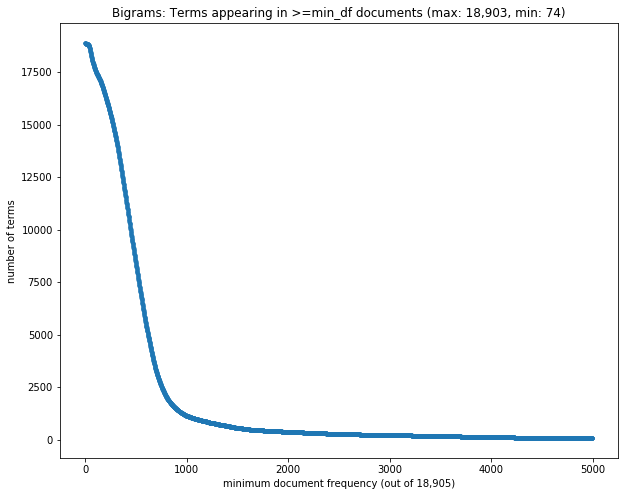

In [13]:
%pylab inline
figsize(10,8)
plt.scatter(df_range, df_counts, marker=".")
plt.ylabel(f"number of terms")
plt.xlabel(f"minimum document frequency (out of {len(df['article']):,})")
plt.title(f"Bigrams: Terms appearing in >=min_df documents (max: {df_counts[0]:,}, min: {df_counts[-1]:,})")
#plt.yscale("log")

In [ ]:
# # run the vectorizer with the parameters we want

# count_vectorizer = feature_extraction.text.CountVectorizer(
#     ngram_range=(1, 2),
# #     stop_words='english',
#     token_pattern="\\b[a-z][a-z]+\\b",
#     min_df=10,
#     max_df=.9,
# )

# count_vectorizer.fit(df['article'])
# counts = count_vectorizer.transform(df['article'])
# print(counts.shape)

In [14]:
counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
# from sklearn import decomposition

# lda = decomposition.LatentDirichletAllocation(
#     n_components=n_topics, 
#     learning_method="online", 
#     verbose=1, 
#     max_iter=5, 
#     n_jobs=-1
# )

# lda.fit(counts)

NameError: name 'n_topics' is not defined

iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
2
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
4
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
5
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
6
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
7
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
8
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
9
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
10
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
11
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
12
iteration: 1 of max_iter: 3
iteration: 2 of max_ite

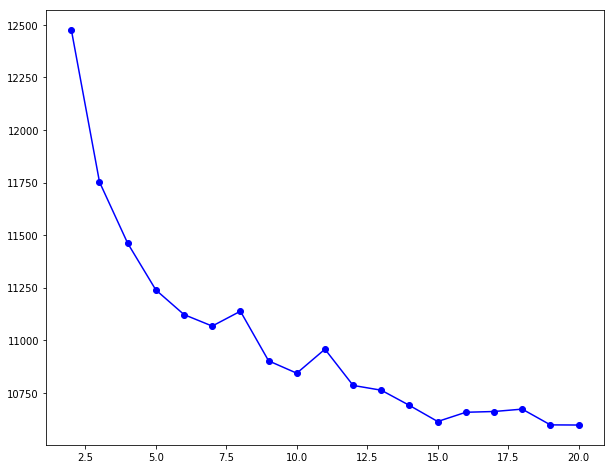

In [16]:
x = range(2,21)
y = []
for topics in x :
    lda = decomposition.LatentDirichletAllocation(n_components=topics, learning_method="online", verbose=1, max_iter=3, n_jobs=1)
    lda.fit(counts)
    y.append(lda.perplexity(counts))
    print(topics)

plt.plot(x, y, 'bo-', )

In [20]:
vocab = np.array(count_vectorizer.get_feature_names())

In [21]:
topic_words = []
for r in lda.components_:
    r_normalized = r/sum(r)
    a = sorted([(v,i) for i,v in enumerate(r_normalized)],reverse=True)[0:10]
    topic_words.append([ f"{vocab[e[1]]}, {e[0]:.2%}"  for e in a])

pd.DataFrame(np.array(topic_words).T)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"beachwood, 0.37%","celebre, 0.56%","biyi, 3.79%","chavannes, 0.55%","botttles, 0.45%","barrenness, 1.07%","asiatic, 1.60%","adath, 0.31%","bell, 1.04%","brumley, 0.61%","biyi, 1.55%","benzoni, 0.74%","brexiter, 0.79%","book, 0.89%","blockaded, 0.56%","anarchy, 1.22%","bandstand, 0.65%","borovik, 0.48%","camilli, 0.49%","bleser, 3.96%"
1,"bannister, 0.24%","bted, 0.40%","belly, 2.35%","allowing, 0.35%","barcia, 0.29%","brumley, 0.78%","assembly, 1.44%","chechens, 0.25%","blusteringly, 0.94%","britishness, 0.55%","carls, 1.29%","chamot, 0.55%","brennan, 0.51%","bela, 0.57%","ambar, 0.47%","afroam, 1.18%","avote, 0.63%","cattau, 0.41%","bandoleer, 0.35%","biyi, 0.77%"
2,"artscenter, 0.21%","backing, 0.39%","barges, 0.74%","anglin, 0.25%","catherine, 0.26%","attemps, 0.73%","asecond, 1.36%","addressing, 0.25%","bourdonnais, 0.91%","azuay, 0.53%","carole, 1.23%","acme, 0.35%","brewster, 0.33%","carlucci, 0.50%","addressee, 0.43%","bolen, 0.55%","bandwidth, 0.58%","bergoltsev, 0.39%","aggeler, 0.30%","channell, 0.63%"
3,"aronovitz, 0.21%","blogged, 0.37%","antelope, 0.62%","carachuri, 0.24%","bolick, 0.21%","carcagno, 0.53%","aspect, 1.36%","aivars, 0.17%","bd, 0.80%","carone, 0.47%","cardi, 1.21%","accordance, 0.35%","briana, 0.33%","butters, 0.48%","ascertain, 0.42%","bibliophiles, 0.52%","bangs, 0.51%","bettelheim, 0.34%","blunders, 0.26%","baja, 0.56%"
4,"blackpine, 0.20%","circulatory, 0.36%","asdefined, 0.51%","bladed, 0.24%","archivist, 0.20%","ballotpedia, 0.51%","ascendance, 1.33%","bacteriasamples, 0.15%","bargainers, 0.78%","burry, 0.37%","captial, 1.21%","awadah, 0.34%","brenan, 0.30%","beetlejuice, 0.44%","affluenza, 0.42%","bahceli, 0.48%","bacharan, 0.50%","biosphere, 0.33%","azem, 0.25%","aunties, 0.52%"
5,"bbg, 0.20%","churritos, 0.34%","bernard, 0.45%","binimelis, 0.23%","carta, 0.17%","basescu, 0.45%","athalie, 1.33%","acerbity, 0.15%","bulge, 0.73%","antiterrorist, 0.32%","belvin, 1.21%","ayoub, 0.31%","brek, 0.27%","birgitta, 0.38%","alesandro, 0.30%","audette, 0.48%","bruchhausen, 0.49%","bramlett, 0.26%","atiwit, 0.24%","asma, 0.51%"
6,"annaluisa, 0.19%","chutzpah, 0.33%","baghdadis, 0.42%","akron, 0.23%","arabization, 0.16%","anatole, 0.44%","assadullahi, 1.31%","adjourns, 0.15%","billbarrowap, 0.71%","arkaday, 0.31%","bernardi, 1.20%","aslan, 0.29%","bedone, 0.23%","bizarro, 0.36%","accpeted, 0.28%","ascender, 0.46%","caricaturing, 0.41%","carousing, 0.25%","aback, 0.23%","animatronic, 0.51%"
7,"cavanaugh, 0.19%","ciccotti, 0.33%","babitz, 0.42%","azito, 0.22%","cataclysms, 0.15%","atulya, 0.42%","assertiveness, 1.28%","anextension, 0.15%","antonov, 0.59%","bedded, 0.31%","bemoans, 1.19%","avuncular, 0.29%","barabba, 0.22%","bayda, 0.36%","chutney, 0.27%","campo, 0.46%","algeria, 0.40%","brenan, 0.23%","azeez, 0.22%","asmerom, 0.44%"
8,"borat, 0.19%","cicilline, 0.29%","bacus, 0.37%","champlin, 0.22%","addled, 0.15%","bother, 0.40%","atkinson, 1.23%","chlorophyll, 0.15%","anomie, 0.52%","cackle, 0.28%","caprices, 1.18%","choung, 0.29%","bluff, 0.21%","bourdonnais, 0.34%","bowers, 0.27%","ather, 0.45%","abruzzi, 0.36%","celebrate, 0.23%","aswad, 0.21%","barracking, 0.43%"
9,"blahnik, 0.19%","civiced, 0.29%","barigar, 0.37%","charlottetown, 0.22%","borges, 0.13%","attempting, 0.39%","asania, 1.23%","annexing, 0.15%","basse, 0.49%","antitax, 0.27%","berumen, 1.15%","betterworks, 0.29%","busy, 0.21%","calculates, 0.32%","chopin, 0.26%","apai, 0.42%","advertisements, 0.36%","bother, 0.20%","aortic, 0.20%","appendages, 0.42%"
